In [1]:
import pandas as pd
import datetime
from os import listdir
import os, os.path
from os.path import isfile, join
import numpy as np
import csv
import re
import pandas as pd
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.log.util import dataframe_utils

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, calinski_harabaz_score, silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, MeanShift, AffinityPropagation

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
df = pd.read_excel('tabla clustering operaciones frecuentes BPI (1).xlsx', index_col=0)
df

,bpi 2015,bpi 2017,bpi 2019,bpi 2020
Operaciones,,,,
Calculate cycle time,1,1,1,1
Group traces,1,1,1,1
Filter traces,1,1,1,1
Identify bottlenecks,1,1,0,1
Calculate number of elements,0,1,1,1
Calculate percentage,0,1,1,1
Calculate statistics,1,0,0,1
Compare cycle time,1,0,0,1
Represent process map,0,1,1,1


In [13]:
def muestra_agrupacion(puntos, clusters):
    puntos_2D = pd.DataFrame(PCA(n_components=2).fit_transform(puntos), columns=['x', 'y'])
    puntos_2D['grupo'] = clusters
    numero_grupos = len(pd.Series(clusters).unique())
    
    plt.figure(figsize=(5,5))
    paleta = sns.color_palette("bright", numero_grupos)
    sns.scatterplot(x='x', y='y', hue='grupo', data=puntos_2D, palette=paleta)
    plt.xticks([], [])
    plt.xlabel('')
    plt.yticks([], [])
    plt.ylabel('')
    plt.show()


          SILHOUETTE
KMEANS-2    0.408004
KMEANS-3    0.558891
KMEANS-4    0.671521
KMEANS-5    0.727273
KMEANS-6    0.727273


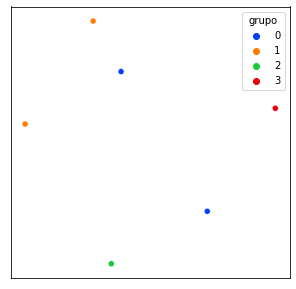

Cluster 0
Identify bottlenecks
Represent histograms

Cluster 1
Calculate number of elements
Calculate percentage
Represent process map
Represent barcharts

Cluster 2
Calculate cycle time
Group traces
Filter traces

Cluster 3
Calculate statistics
Compare cycle time



In [31]:
METRICAS = pd.DataFrame(columns=['SILHOUETTE'])

kmeans2 = KMeans(n_clusters=2, random_state=0).fit(df)
METRICAS.loc['KMEANS-2'] = (silhouette_score(df, kmeans2.labels_))

kmeans3 = KMeans(n_clusters=3, random_state=0).fit(df)
METRICAS.loc['KMEANS-3'] = (silhouette_score(df, kmeans3.labels_))

kmeans4 = KMeans(n_clusters=4, random_state=0).fit(df)
METRICAS.loc['KMEANS-4'] = (silhouette_score(df, kmeans4.labels_))

kmeans5 = KMeans(n_clusters=5, random_state=0).fit(df)
METRICAS.loc['KMEANS-5'] = (silhouette_score(df, kmeans5.labels_))

kmeans6 = KMeans(n_clusters=6, random_state=0).fit(df)
METRICAS.loc['KMEANS-6'] = (silhouette_score(df, kmeans6.labels_))

print(METRICAS)

muestra_agrupacion(df, kmeans4.labels_)

for n in range(kmeans4.n_clusters):
    print('Cluster' ,  n) 
    for s in range(len(df)):
        if (kmeans4.labels_[s] == n):
            print(df.index[s])
    print("")
    